# LETS GROW MORE DATA SCIENCE INTERNSHIP
# NAME: VAVILA S S V S SIRI SUDHEEKSHA

# Handwritten Equation solver using CNN
# ADVANCED LEVEL- TASK -3

## 1. Import libarary 

In [1]:
import numpy as np
import cv2
from skimage import measure
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
import os
from os import listdir
from os.path import isfile, join
import pandas as pd

## 2.Data Preparation

In [5]:
def load_images_from_folder(folder):
    train_data=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        img=~img
        if img is not None:
            ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
            ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
            cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
            w=int(28)
            h=int(28)
            maxi=0
            for c in cnt:
                x,y,w,h=cv2.boundingRect(c)
                maxi=max(w*h,maxi)
                if maxi==w*h:
                    x_max=x
                    y_max=y
                    w_max=w
                    h_max=h
            im_crop= thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
            im_resize = cv2.resize(im_crop,(28,28))
            im_resize=np.reshape(im_resize,(784,1))
            train_data.append(im_resize)
    return train_data

In [32]:
def prepdata(folder,classs):
    temp=load_images_from_folder(folder)
    for i in range(0,len(temp)):
        temp[i]=np.append(temp[i],[classs])
    
    return temp
    

In [48]:
#assign '-'=10
data= prepdata('-','10')
print(len(data))
#assign '+'=11
temp= prepdata('+','11')
data=np.concatenate((data,temp))
print(len(data))

4152
8184


In [49]:
temp= prepdata('0','0')
data=np.concatenate((data,temp))
print(len(data))
temp= prepdata('1','1')
data=np.concatenate((data,temp))
print(len(data))

12018
16074


In [50]:
temp= prepdata('2','2')
data=np.concatenate((data,temp))
print(len(data))
temp= prepdata('3','3')
data=np.concatenate((data,temp))
print(len(data))
temp= prepdata('4','4')
data=np.concatenate((data,temp))
print(len(data))

20334
23850
24396


In [51]:
temp= prepdata('5','5')
data=np.concatenate((data,temp))
print(len(data))
temp= prepdata('6','6')
data=np.concatenate((data,temp))
print(len(data))
temp= prepdata('7','7')
data=np.concatenate((data,temp))
print(len(data))

27940
31057
33965


In [52]:
temp= prepdata('8','8')
data=np.concatenate((data,temp))
print(len(data))
temp= prepdata('9','9')
data=np.concatenate((data,temp))
print(len(data))

37032
40768


In [53]:
#assign '*'=11
temp= prepdata('times','12')
data=np.concatenate((data,temp))
print(len(data))

44018


In [54]:
df=pd.DataFrame(data,index=None)
df.to_csv('train_final.csv',index=False)

## 3.Model Building 

In [284]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

Using TensorFlow backend.


In [271]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,10
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10


In [272]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
44013,200,200,55,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
44014,55,55,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
44015,0,133,58,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
44016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
44017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12


In [277]:
labels=df[784]
df.drop(df.columns[[784]],axis=1,inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [280]:
labels.head()

0    10
1    10
2    10
3    10
4    10
Name: 784, dtype: object

In [300]:
# Model / data parameters
num_classes = 13
input_shape = (28, 28, 1)
l = df

# Scale images to the [0, 1] range
l = l.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
#l = np.expand_dims(x_train, -1)
x_train=[]
for i in range(44018):
    x_train.append(np.array(l[i:i+1]).reshape(28,28,1))
x_train=np.array(x_train)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")


x_train shape: (44018, 28, 28, 1)
44018 train samples


In [286]:
np.unique(labels)

array(['0', '1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9'],
      dtype=object)

In [288]:
# convert class vectors to binary class matrices
y_train =labels
y_train = keras.utils.to_categorical(y_train, num_classes)

In [291]:
model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3)) # Dropout, one form of regularization
model.add (Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add (MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add( Dropout(0.5))
#model.add(Flatten())
model.add(Dense(13, activation='softmax'))
#model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 1600)              0         
__________

In [302]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.3,shuffle=True,verbose=1)

Train on 30812 samples, validate on 13206 samples
Epoch 1/5
30812/30812 [==============================] - 56s 2ms/step - loss: 0.1268 - acc: 0.9649 - val_loss: 7.3441 - val_acc: 0.0220
Epoch 2/5
30812/30812 [==============================] - 55s 2ms/step - loss: 0.1122 - acc: 0.9689 - val_loss: 8.2816 - val_acc: 0.0196
Epoch 3/5
30812/30812 [==============================] - 57s 2ms/step - loss: 0.1073 - acc: 0.9695 - val_loss: 8.8870 - val_acc: 0.0189
Epoch 4/5
30812/30812 [==============================] - 55s 2ms/step - loss: 0.0991 - acc: 0.9716 - val_loss: 9.1560 - val_acc: 0.0183
Epoch 5/5
30812/30812 [==============================] - 55s 2ms/step - loss: 0.0932 - acc: 0.9738 - val_loss: 9.4225 - val_acc: 0.0182


In [303]:
from keras.models import model_from_json
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")

## 4.Testing on image

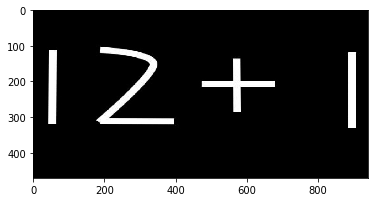

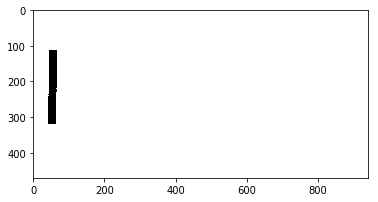

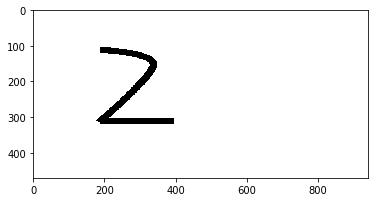

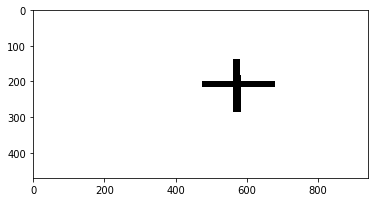

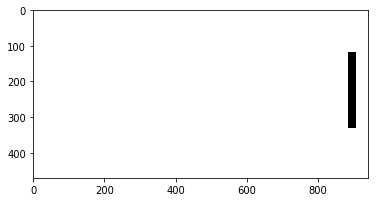

In [357]:
image = cv2.imread('test.jpeg',cv2.IMREAD_GRAYSCALE)
image=~image
plt.imshow(image,cmap='gray')
plt.show()
image=cv2.rotate(image,cv2.ROTATE_90_CLOCKWISE)
(ret,thresh)=cv2.threshold(image,128,255,cv2.THRESH_BINARY)
all_=measure.label(thresh,background=0)
#to find numbe of object
#pp=measure.regionprops(all_)
#len(pp)
train_data=[]
for lbl in np.unique(all_):
    if lbl==0:
        continue
    image1=all_==lbl
    type(image1)
    #image1=~image1
    image1=cv2.rotate(np.float32(image1),cv2.ROTATE_90_COUNTERCLOCKWISE)
    
    plt.imshow(image1,cmap='binary')
    plt.show()
    im_resize = cv2.resize(image1,(28,28))
    im_resize=np.reshape(im_resize,(28,28,1))
    train_data.append(im_resize)

In [358]:
s=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=model.predict_classes(train_data[i])
    if(result[0]==10):
        s=s+'-'
    if(result[0]==11):
        s=s+'+'
    if(result[0]==12):
        s=s+'*'
    if(result[0]==0):
        s=s+'0'
    if(result[0]==1):
        s=s+'1'
    if(result[0]==2):
        s=s+'2'
    if(result[0]==3):
        s=s+'3'
    if(result[0]==4):
        s=s+'4'
    if(result[0]==5):
        s=s+'5'
    if(result[0]==6):
        s=s+'6'
    if(result[0]==7):
        s=s+'7'
    if(result[0]==8):
        s=s+'8'
    if(result[0]==9):
        s=s+'9'
    
print(s)    

12+1


In [344]:
eval(s)

13